In [1]:
__author__ = "Carlos Muñoz Pérez"
__version__ = "First version - August 2023"

# Lingbuzz data analysis

[Lingbuzz](https://ling.auf.net/) is an online repository of preprints in linguistics. As of August 2023, it hosts around 7500 manuscripts with information about their authors, keywords, place of publication, number of downloads and abstracts. This data was collected as a csv file by using [lingbuzz_scraper](https://github.com/cmunozperez/lingbuzz_scraper); the full csv file can be downloaded from [here](https://github.com/cmunozperez/lingbuzz_scraper/blob/master/lingbuzz%20Aug_23_2023/lingbuzz_002_007537.csv).

What follows is an analysis of this dataset.

Suggestions on improvements are very welcome!

In [2]:
# Imports
import pandas as pd
from collections import Counter

In [3]:
# Loading the csv file
df_main = pd.read_csv('lingbuzz_002_007537.csv')

# Dropping blank entries
df_main.dropna(subset=['Title'], inplace=True)

In [4]:
# Giving format to the Date column
df_main['Date'] = pd.to_datetime(df_main['Date'])
df_main['Date'] = df_main['Date'].dt.strftime('%Y-%m')

# Giving format to the Downloads column
df_main['Downloads'] = df_main['Downloads'].apply(int)

### Most downloaded manuscripts

Lingbuzz provides a ranking for the most downloaded paper during the last six months. The following is the ranking of the ten most downloaded papers ever.

In [5]:
# This orders the manuscripts according to the number of downloads and shows the top 10
top_ten_ms_downloads = df_main.sort_values(by='Downloads', ascending=False)

top_ten_ms_downloads.head(10)

Id                                              Title  \
878   lingbuzz/001050      STUDENTS WRITING ERRORS IN EFL: A Case Study   
693    lingbuzz/00863               The Structure of Phonological Theory   
1940  lingbuzz/002110     Pragmatic Reasoning through Semantic Inference   
7008  lingbuzz/007180  Modern language models refute Chomsky’s approa...   
1422  lingbuzz/001592                   A Potpourri of Chomskyan Science   
298    lingbuzz/00411              Piraha Exceptionality: a Reassessment   
1988  lingbuzz/002159  The Null Subject Parameter. Where are we, and ...   
655    lingbuzz/00825                      Features in Minimalist Syntax   
7471   lingbuzz/00307  Verb Meaning and the Lexicon: A First Phase Sy...   
3565  lingbuzz/003737                         Linguistic Missing Links.    

                                                Authors  \
878                                   Haifa Al-Buainain   
693                                     Bridget Samuels   
1940                          Leon Bergen, Noah Goodman   
7008                                  Steven Piantadosi   
1422                                    Christina Behme   
298   Andrew Ira Nevins, David Pesetsky, Cilene Rodr...   
1988                               Roberta D'Alessandro   
655                        Peter Svenonius, David Adger   
7471                                   Gillian Ramchand   
3565                                    Gerard Cheshire   

                                               Keywords  \
878   learners writing errors: suggestions for teac...   
693   phonology, pf interface, distributed morpholog...   
1940  pragmatics, game theory, hurford's constraint,...   
7008  large language model, minimalism, chomsky, gen...   
1422  chomsky, chomsky's science of language, minima...   
298   piraha, pirahã, recursion, embedding, universa...   
1988  null subjects, pro-drop, pro, partial null sub...   
655   features, minimalism, privative, checking, uni...   
7471  verbal decomposition, aktionsart, event struct...   
3565  proto-romance, proto-italics, ms 408, voynich ...   

                                           Published_in     Date  Downloads  \
878   Journal of  Faculty of Education. University o...  2009-12      51045   
693                PhD dissertation, Harvard University  2009-04      19389   
1940                                          Submitted  2015-10      19370   
7008                                               None  2023-03      18756   
1422  Philosophy in Review, http://journals.uvic.ca/...  2015-01      18618   
298                                                None  2009-06      18248   
1988  1st draft; published as: D'Alessandro, Roberta...  2014-07      14380   
655   submitted to the Oxford Handbook of Linguistic...  2010-02      13982   
7471            (to appear), Cambridge University Press  2007-03      13387   
3565                                        Submitted.   2018-04      11600   

                                               Abstract  
878   Writing is a productive skill. It is one of th...  
693   This dissertation focuses on "the syntax of ph...  
1940  A number of recent proposals have used techniq...  
7008  The rise and success of large language models ...  
1422  This paper is an extension of a review of Noam...  
298   Everett (2005) has claimed that the grammar of...  
1988  The NSP has been one of the most debated param...  
655   We delineate some core conceptual issues that ...  
7471  This is a monograph exploring an event-decompo...  
3565  Linguistic missing links: This paper explains ...

### Authors with the most manuscripts in the repository

The repository does not inform about the number of manuscripts upluaded by each author. I provide here a function to get this information.

In [6]:
# A function to get the number of manuscripts per author

def ms_per_author(n = None):
    '''
    Takes a number n and returns the n authors with the most manuscripts.
    If no n is introduced, it returns a dictionary with counts for all authors.
    
    Parameters
    ----------
    n : int, optional

    Returns
    -------
    dictionary
        A dictionary with counts of manuscripts per author 

    '''
    authors = []
    for cell in df_main['Authors']:
        authors += cell.split(', ')
    if n == None:  
        return dict(Counter(authors))
    else:
        return dict(Counter(authors).most_common(n))

Here, I use the function `ms_per_author()` to get the ten authors that uploaded the most manuscripts to lingbuzz.

In [7]:
ten_most_contributions = ms_per_author(10)

ten_most_contributions

{'Shigeto Kawahara': 91,
 'Philippe Schlenker': 88,
 'Richard Kayne': 71,
 'Andrew Ira Nevins': 66,
 'Yosuke Sato': 65,
 'Chris Collins': 58,
 'Friederike Moltmann': 51,
 'Halldor Armann Sigurdsson': 48,
 'David Adger': 47,
 'Andrés Saab': 47}

### Number of downloads per author

This allows to see which authors are the most read/downloaded in the repository. First, I provide a function that retrieves the number of downloads for each of the authors in lingbuzz.

In [8]:
def downloads_per_author(n = None):
    '''
    Takes a number n and returns the n authors with the most downloads.
    If no n is introduced, it returns a dictionary with counts for all authors.
    
    Parameters
    ----------
    n : int, optional

    Returns
    -------
    dictionary
        A dictionary with counts of downloads per author 

    '''
    authors_down = {}
    for i in range(len(df_main)):
        aut_paper = df_main.iloc[i, 2].split(', ')
        downloads = df_main.iloc[i, 6]
        for person in aut_paper:
            if person in authors_down.keys():
                authors_down[person] += downloads
            else:
                authors_down[person] = downloads
    if n == None:
        n = len(authors_down)
    
    sorted_n = sorted(authors_down.items(), key=lambda x: x[1], reverse=True)[:n]
    return dict(sorted_n)

Here, I use the function `downloads_per_author()` to get the ten authors that got the most total downloads.

In [9]:
ten_most_downloads = downloads_per_author(10)

ten_most_downloads

{'Philippe Schlenker': 131181,
 'Shigeto Kawahara': 114954,
 'Andrew Ira Nevins': 95966,
 'David Adger': 86918,
 'Peter Svenonius': 83339,
 'Lucas Champollion': 77732,
 'Halldor Armann Sigurdsson': 75178,
 'Michael Yoshitaka Erlewine': 73375,
 'Chris Collins': 72607,
 'David Pesetsky': 66965}

### Most frequent keywords

Most of the manuscripts in the database provide keywords describing its content. It is possible to count which keywords are the most frequent in the repository to see which topics are the most popular. First, I provide a function that counts keyword uses.

In [10]:
# A function to count keyword uses

def keyword_counter(n = None):
    '''
    Takes a number n and returns the n most common keywords. If no n is introduced, it returns a dictionary with counts for all keywords.
    
    Parameters
    ----------
    n : int, optional

    Returns
    -------
    dictionary
        A dictionary with counts of keywords 

    '''
    keywords = []
    for cell in df_main['Keywords']:
        keywords += cell.split(', ')
    keywords = [key.lower() for key in keywords]
    if n == None:  
        return dict(Counter(keywords))
    else:
        return dict(Counter(keywords).most_common(n))

Here, I use the function `keyword_counter()` to get the ten most frequent keywords in the dataset. The results reflect the fact that in order to upload a manuscript it is necessary to define to which linguistic subdiscipline it belongs, i.e., syntax, semantics, morphology or phonology.

In [11]:
top_10_keywords = keyword_counter(10)

top_10_keywords

{'syntax': 5447,
 'semantics': 2880,
 'morphology': 2082,
 'phonology': 1473,
 'agreement': 377,
 'case': 253,
 'ellipsis': 222,
 'focus': 175,
 'negation': 153,
 'english': 152}

A better way of visualizing the frequency of keywords is through a word cloud. The following code produces a word cloud with the top 150 most frequent keywords. The image produced here is smaller due to github restrictions. A bigger version of this plot can be downloaded from [here](https://github.com/cmunozperez/lingbuzz_data_analysis/blob/main/images/output_21_0.png).

In [12]:
top_150_keywords = keyword_counter(150)

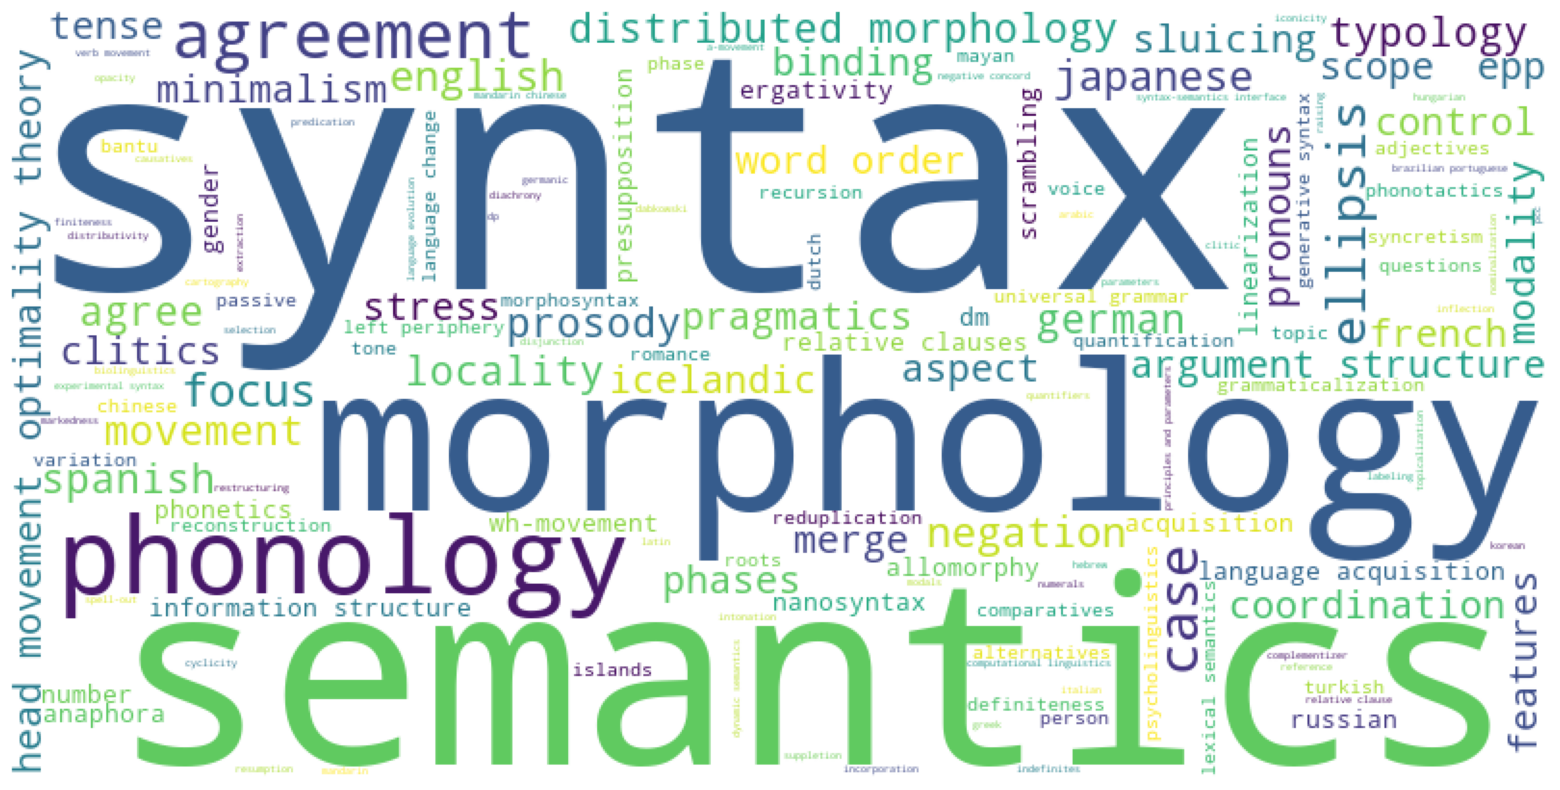

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# wordcloud = WordCloud(width=1600, height=800, background_color='white') # This image size is too big for github

# This produces a smaller image
wordcloud = WordCloud(width=800, height=400, background_color='white')

wordcloud.generate_from_frequencies(top_150_keywords)
        
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Trends in subdisciplines over time

Given that most papers include keywords related to their respective linguistic subdisciplines (i.e., syntax, semantics, morphology and phonology), we can quantify the volume of papers associated with each subdiscipline over the years. This allows to observe the evolving popularity of each subdiscipline.

The first step is creating a function that picks linguistic subdisciplines from a list of keywords.

In [14]:
# This is a function that applied to a cell with keywords returns the linguistic subdiscipline listed there (e.g., syntax)
# or a combination of them if two or more subdisciplines are listed (e.g., morphology + syntax)

def keyword_checker(cell):
    target_keywords = [ 'phonology', 'morphology', 'syntax', 'semantics']
    contained_keywords = []
    for word in target_keywords:
        if word in cell:
            contained_keywords.append(word)
    replacement = ' + '.join(contained_keywords)
    return replacement

This function allows to make a new DataFrame with the amount of papers in each subdiscipline for each year. The table below registers this for the period between 2002 to 2022.

In [15]:
# This creates a new DataFrame
df_key = pd.DataFrame()

# It will have the Id, Year of publication and the subdisciplines in the manuscript
df_key['Id'] = df_main['Id']
df_key['Year'] = pd.to_datetime(df_main['Date']).dt.year
df_key['Year'] = df_key['Year'].apply(str)
df_key['Disciplines'] = df_main['Keywords'].apply(keyword_checker)

# Now we count the number of manuscripts of each discipline per year
df_key = df_key.groupby(['Year', 'Disciplines']).size().reset_index(name='count')

# And we drop some combinations of subdisciplines with few entries
combinations_to_drop = ['', 'morphology + semantics', 'phonology + morphology + semantics', 'phonology + morphology + syntax', 'phonology + morphology + syntax + semantics', 'phonology + semantics', 'phonology + syntax', 'phonology + syntax + semantics']
df_key = df_key.drop(df_key[df_key['Disciplines'].isin(combinations_to_drop)].index)

# Let's have a column with counts for each subdiscipline
df_key = df_key.pivot_table(index='Year', columns='Disciplines', values='count', fill_value=0)

# And remove the years prior to 2002
df_key = df_key.drop(df_key.index[:16])

# And remove 2023, which is not finished yet
df_key = df_key.drop(df_key.index[-1])

# This reorders the columns
df_key = df_key[['syntax', 'semantics', 'syntax + semantics',
                     'morphology + syntax', 'phonology', 'morphology + syntax + semantics',
                     'morphology', 'phonology + morphology']]

df_key.head(21)

Disciplines  syntax  semantics  syntax + semantics  morphology + syntax  \
Year                                                                      
2002             11          1                   3                    4   
2003             23          3                   5                    3   
2004             45         12                  10                    9   
2005             50         10                  16                    9   
2006             59          8                  24                   17   
2007             88         11                  29                   22   
2008            104         11                  28                   29   
2009             84          9                  38                   28   
2010             94         16                  40                   26   
2011             96         16                  37                   29   
2012            103         16                  42                   50   
2013            108         11                  30                   34   
2014            116         31                  47                   34   
2015            130         62                  72                   54   
2016            124         73                  68                   43   
2017            149         67                  72                   74   
2018            133         81                  90                   68   
2019            133         83                  88                   60   
2020            167        104                  96                   74   
2021            152        121                 115                   78   
2022            144        140                  93                   74   

Disciplines  phonology  morphology + syntax + semantics  morphology  \
Year                                                                  
2002                 0                                0           2   
2003                 4                                0           3   
2004                 5                                6           3   
2005                 6                                2           3   
2006                 7                                5           6   
2007                 9                                7           5   
2008                13                               13           2   
2009                11                               11           3   
2010                14                               18           1   
2011                17                               17           0   
2012                25                               19           2   
2013                36                               17           8   
2014                22                               19           4   
2015                45                               28           8   
2016                32                               27           6   
2017                56                               25           5   
2018                50                               16          12   
2019                54                               13          11   
2020                52                               31          13   
2021                74                               41          25   
2022                58                               26          22   

Disciplines  phonology + morphology  
Year                                 
2002                              1  
2003                              1  
2004                              1  
2005                              2  
2006                              3  
2007                              2  
2008                              0  
2009                              1  
2010                              2  
2011                              1  
2012                             14  
2013                              8  
2014                             10  
2015                             11  
2016                            

This information is easier to see as a plot.

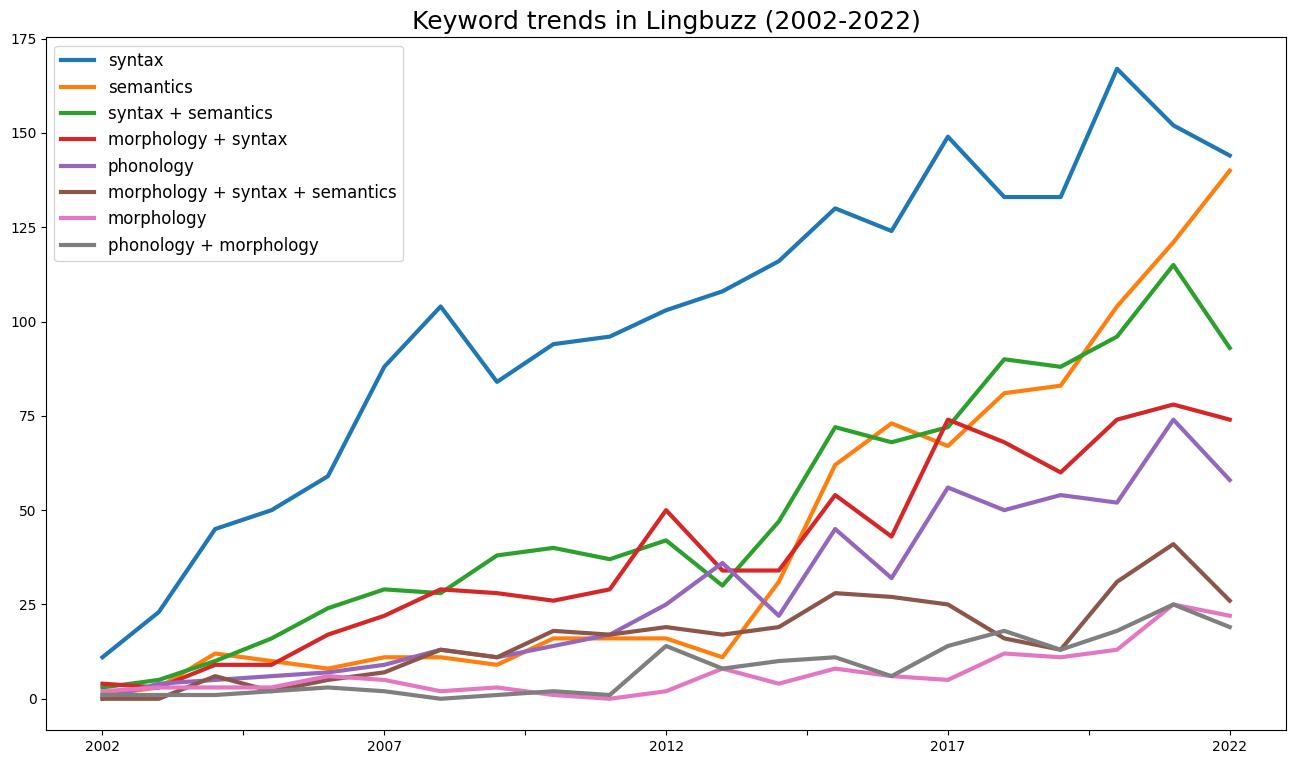

In [16]:
# This plots a graph from df_key
df_key.plot(kind='line', stacked=False, figsize=(16, 9), linewidth=3)
plt.xlabel('')
plt.title('Keyword trends in Lingbuzz (2002-2022)', fontsize=18)
plt.legend(fontsize=12);

### Collaborations and co-authorship networks

The information about manuscript authorship can be utilized to identify collaborations that result in the highest number of jointly authored papers within the repository, as well as to construct co-authorship networks within the field of linguistics.

The following function retrieves pairs of authors in the dataset and the number of manuscripts they wrote together.

In [17]:
# This function returns a dictionary with a pair of authors (tuple) as key, and the number of papers they wrote together as value
def network_connections():
    connections = {}
    for cell in df_main['Authors']:
        authors = cell.split(', ')
        conn_by_paper = []
        for a in authors:
            for b in authors:
                if a != b:
                    conn = frozenset({a, b})
                    conn_by_paper.append(conn)
        conn_by_paper = set(conn_by_paper)
        for i in conn_by_paper:
            if i in connections.keys():
                connections[i] += 1
            else:
                connections[i] = 1
    return {tuple(key): value for key, value in connections.items()}


In [18]:
connections = network_connections()

The following retrieves the pairs of authors who wrote together 9 or more manuscripts in Lingbuzz.

In [19]:
# This filters the pairs of authors who wrote together more than 8 papers
for pair in sorted(connections.keys(), reverse=True, key= lambda x: connections[x]):
    ms_together = connections[pair]
    if ms_together > 8:
        print(pair,ms_together)

('Philippe Schlenker', 'Emmanuel Chemla') 16
('Yusuke Kubota', 'Bob Levine') 16
('Karen De Clercq', 'Guido Vanden Wyngaerd') 16
('Gakuji Kumagai', 'Shigeto Kawahara') 13
('Sandhya Sundaresan', 'Thomas McFadden') 11
('Franc Lanko Marušič', 'Rok Zaucer') 10
('Aaron Steven White', 'Benjamin Van Durme') 10
('Andrew Ira Nevins', 'Karlos Arregi') 9
('Chris Collins', 'Paul Postal') 9
('Adina DRAGOMIRESCU', 'Alexandru Nicolae') 9
('Pavel Caha', 'Karen De Clercq') 9
('Pavel Caha', 'Guido Vanden Wyngaerd') 9


This information can be used to construct a *co-authorship network*. I take these to be undirected graphs, as stated in the definition by [Savić, Ivanović, & Jain (2019: 181)](https://doi.org/10.1007/978-3-319-91196-0_5).

> Let *U* be a set of bibliographic units (journal and conference publications, books, and so on), and let *A* be the set of authors appearing in *U*. The co-authorship network corresponding to *U* is most commonly defined as an undirected and weighted graph *G = (V, E)* with the following properties:

> - The set of nodes *V* corresponds to the set of authors *A*, i.e. each author from *A* is represented by one node in *G*.
> - Two authors *x* and *y* are connected by an undirected link *e* (*e ∈ E*) if there is at least one bibliographic unit in *U* jointly co-authored by *x* and *y* (with or without other co-authors). In other words, co-authorship networks are author-centered onemode projections of bipartite networks linking researchers to bibliographic units they (co-)authored.
> - Link weights express the strength of collaboration between connected authors.

In [20]:
import networkx as nx

# This creates an undirected graph
G = nx.Graph()

# This "fills it" with the data from the pairs of authors
for key, value in connections.items():
    G.add_edge(key[0], key[1], weight=value)

The following code retrieves the total number of authors in lingbuzz.

In [21]:
total_amount_authors = G.number_of_nodes()

total_amount_authors

2225

And the following are the ten people with the most co-authors in the repository.

In [22]:
#Getting the people with most co-authors
most_collaborators = sorted(list(G.degree()), key=lambda x: x[1], reverse=True)
most_collaborators[:10]

[('Andrew Ira Nevins', 57),
 ('Emmanuel Chemla', 46),
 ('Philippe Schlenker', 38),
 ('Shigeto Kawahara', 33),
 ('Franc Lanko Marušič', 29),
 ('Aaron Steven White', 28),
 ('Gregory Carlson', 24),
 ('Michael K. Tanenhaus', 24),
 ('Anastasia Giannakidou', 24),
 ('Petra Mišmaš', 24)]

The next step is to check whether co-authorship relations determine a single network, or whether there are several co-authorship networks.

In [23]:
only_one_network = nx.is_connected(G)

print('Is there a unified co-authorship network among the authors in Lingbuzz?')
print(only_one_network)

Is there a unified co-authorship network among the authors in Lingbuzz?
False


The following code retrieves (i) the total number of co-authorship networks in lingbuzz, and (ii) the number of authors in each of the five biggest networks.

In [24]:
co_authorship_networks = list(nx.connected_components(G))

size_networks = [len(network) for network in co_authorship_networks]

print(f'There are {len(size_networks)} co-authorship networks in Lingbuzz.')
print(f'The five biggest ones have the following number of authors in them: {sorted(size_networks, reverse=True)[:5]}')

There are 211 co-authorship networks in Lingbuzz.
The five biggest ones have the following number of authors in them: [1530, 19, 13, 13, 12]


Thus, 1530 of a total of 2225 authors are part of the same co-authorship network. The following code plots this network. The image produced here is smaller due to github restrictions. A bigger and readable version of this plot can be downloaded from [here](https://github.com/cmunozperez/lingbuzz_data_analysis/blob/main/images/output_44_1.png).

C:\Users\Carlos\anaconda3\envs\spyder-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


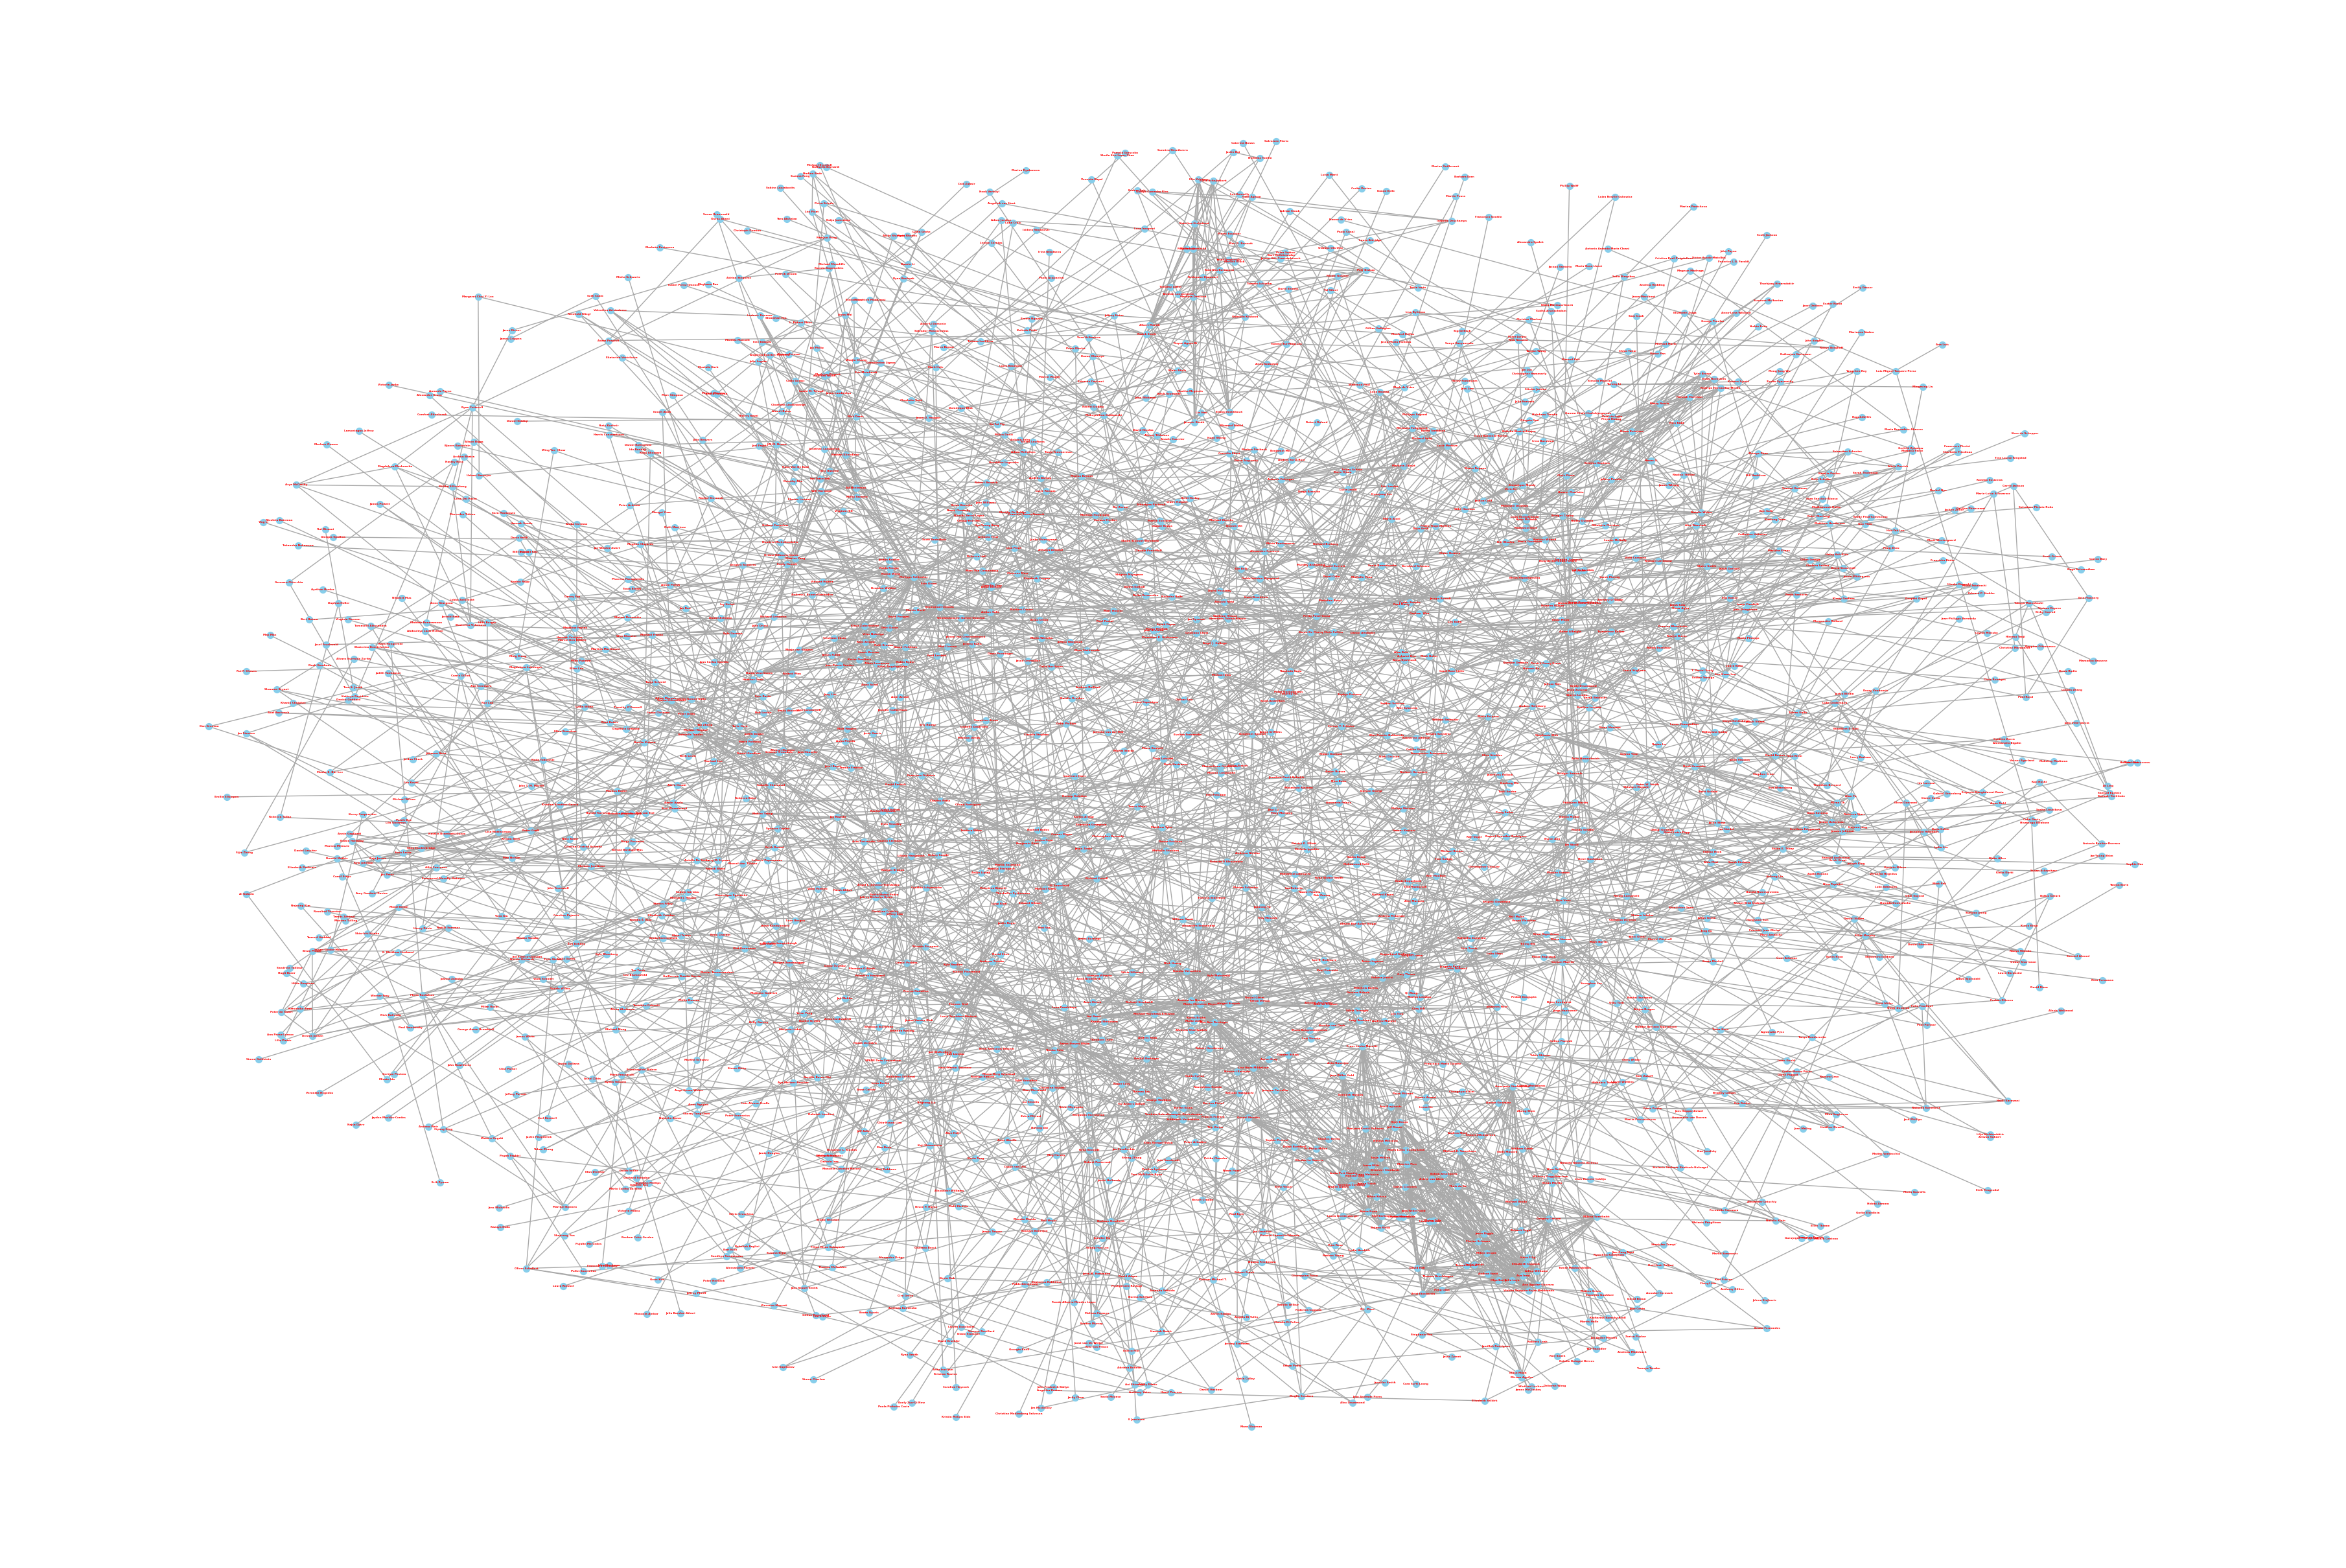

In [25]:
# This takes the largest co-authorship network
biggest_network = max(co_authorship_networks, key=len)

# This creates a subgraph with it
subgraph = G.subgraph(biggest_network)

# And this generates a plot form it
 

## This produces a smaller image
plt.figure(figsize=(36, 24))

pos = nx.spring_layout(G, k=0.2)
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=50, font_size=3,
        font_color='red', font_weight='bold', edge_color='darkgrey')

# The following code generates an image big enough to have readable labels, but too heavy for github to show
###########################################################################
# plt.figure(figsize=(216, 144))

# pos = nx.spring_layout(G, k=0.2)
# nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=15,
#         font_color='red', font_weight='bold', edge_color='darkgray')
###########################################################################


plt.show();